In [2]:
from ml_config import *
from jw_package import *
pd.options.mode.chained_assignment = None

import configuration completed !
train + key + weather merging started
train + key + weather merging finished
function configuration completed ! 
Good to go !


In [17]:
def missing_to_nan_weather(station_nbr):
    print('missing_to_nan started !')
    
    full_weather = load_weather()
    
    full_weather = full_weather[full_weather['station_nbr']==station_nbr]
    
    # sunrise, sunset, category는 연속형변수가 아니므로 일단 뺌
    weathers = set(list(full_weather.columns)[2:20])
    targets = weathers - {'sunset','sunrise','codesum'}
    
    def trim_str(x):
        import re
                            # 실수만 추출
        result = re.findall('(\d+(?:\.\d+)?)',x)
        if result:
            return float(result[0])
        return np.nan
    
    for weather in targets:
        full_weather.loc[:,weather] = full_weather.loc[:,weather].astype(str).apply(trim_str).astype(float)
    
    print('missing_to_nan completed !')
    return full_weather.reset_index(drop=True)

In [18]:
def how_many_missing(nan_weather):
    
    weathers = set(list(nan_weather.columns)[2:20])
    targets = weathers - {'sunset','sunrise','codesum'}
    
    how_many = dict()
    total = len(nan_weather)
    
    for weather in targets:
        not_missing = len(nan_weather[weather].dropna())
    
        msg = 'total = '+ str(total) +' '
        msg += ', missing = '+ str(total - not_missing)
        
        how_many[weather] = msg
    
    return how_many

In [19]:
def all_missing(nan_weather, weather):
    # 1. 날씨가 가장 비슷한 다른 station의 weather를 상속받거나
    # 2. 일단 제외하고 계산하거나
    # 3. 전부 missing인 feature를 빼거나
    
#     this_store_nbr = nan_weather.loc[0,'store_nbr']
    this_station_nbr = nan_weather.loc[0,'station_nbr']
    
#     # 1.
#     if not find_store(this_station_nbr):
#         return nan_weather

#     # 2.
# #     this_station = 
     
    
    print('\t',weather,' EJECTED FROM COLUMN')
    return nan_weather.drop(weather,axis=1)

In [20]:
def partial_missing(nan_weather, weather):
    nan_feature = nan_weather[weather]

    nan_feature[nan_feature.isnull()] = nan_feature.mean()

    nan_weather.loc[:,weather] = nan_feature
    
    print('\t',weather,' : ',nan_feature.mean())
    
    if len(nan_feature[nan_feature.isnull()])==0:
        return nan_weather
    
    print('Error occured when partial_missing() by mean')
    print('station_nbr: ',nan_weather['station_nbr'][0],', feature = ',weather)
    return nan_weather

In [21]:
def replace_by_mean(nan_weather, weather):
    total = len(nan_weather)
    not_missing = len(nan_weather[weather].dropna())
    
    # 1. 아예 없다
    # 같은 station의 store의 평균
    if not_missing == 0:
        return all_missing(nan_weather, weather)
        
    # 2. 있긴 있다
    # 그 store의 평균
    elif 0 < not_missing < total:
        return partial_missing(nan_weather, weather)
    
    # missing이 없는 경우는 아무것도 안함
    return nan_weather

In [22]:
def filling_missing_by_mean(station_nbr):
    nan_weather = missing_to_nan_weather(station_nbr)
    how_many = how_many_missing(nan_weather)
    
    weathers = set(list(nan_weather.columns)[2:20])
    targets = weathers - {'sunset','sunrise','codesum'}
    
    for weather in targets:
        nan_weather = replace_by_mean(nan_weather,weather)
        
    return nan_weather, how_many

In [24]:
filled, how = filling_missing_by_mean(1)

missing_to_nan started !
missing_to_nan completed !
	 preciptotal  :  0.11841536614645913
	 snowfall  EJECTED FROM COLUMN
	 tmax  :  61.50338818973863
	 tmin  :  42.59632139399806
	 cool  :  2.3100097181729837
	 depart  EJECTED FROM COLUMN
	 sealevel  :  30.013398247322314
	 avgspeed  :  6.5721899224806215
	 resultdir  :  20.35111542192047
	 heat  :  15.006802721088436
	 wetbulb  :  46.1005859375
	 dewpoint  :  39.1622934888241
	 resultspeed  :  5.3556741028128
	 tavg  :  52.303206997084544
	 stnpressure  :  29.848089233753644


In [25]:
filled

,station_nbr,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,...,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
0,1,2012-01-01,52.0,31.0,42.0,36.0,40.0,23.0,0.0,-,...,RA FZFG BR,0.050000,29.78,29.92,3.6,20.0,4.6,2012,1,1
1,1,2012-01-02,50.0,31.0,41.0,26.0,35.0,24.0,0.0,-,...,,0.010000,29.44,29.62,9.8,24.0,10.3,2012,1,2
2,1,2012-01-03,32.0,11.0,22.0,4.0,18.0,43.0,0.0,-,...,,0.000000,29.67,29.87,10.8,31.0,11.6,2012,1,3
3,1,2012-01-04,28.0,9.0,19.0,1.0,14.0,46.0,0.0,-,...,,0.000000,29.86,30.03,6.3,27.0,8.3,2012,1,4
4,1,2012-01-05,38.0,25.0,32.0,13.0,25.0,33.0,0.0,-,...,,0.000000,29.67,29.84,6.9,25.0,7.8,2012,1,5
5,1,2012-01-06,46.0,25.0,36.0,21.0,29.0,29.0,0.0,-,...,SN,0.118415,29.68,29.84,0.3,1.0,2.4,2012,1,6
6,1,2012-01-07,57.0,28.0,43.0,28.0,36.0,22.0,0.0,-,...,,0.000000,29.57,29.76,3.0,26.0,3.6,2012,1,7
7,1,2012-01-08,45.0,27.0,36.0,22.0,32.0,29.0,0.0,-,...,,0.000000,29.90,30.11,5.1,30.0,6.6,2012,1,8
8,1,2012-01-09,39.0,23.0,31.0,12.0,25.0,34.0,0.0,-,...,,0.000000,30.06,30.20,2.3,23.0,4.0,2012,1,9
9,1,2012-01-10,47.0,29.0,38.0,24.0,32.0,27.0,0.0,-,...,,0.118415,29.69,29.86,5.4,25.0,6.5,2012,1,10


In [26]:
how

{'avgspeed': 'total = 1035 , missing = 3',
 'cool': 'total = 1035 , missing = 6',
 'depart': 'total = 1035 , missing = 1035',
 'dewpoint': 'total = 1035 , missing = 6',
 'heat': 'total = 1035 , missing = 6',
 'preciptotal': 'total = 1035 , missing = 202',
 'resultdir': 'total = 1035 , missing = 4',
 'resultspeed': 'total = 1035 , missing = 4',
 'sealevel': 'total = 1035 , missing = 8',
 'snowfall': 'total = 1035 , missing = 1035',
 'stnpressure': 'total = 1035 , missing = 4',
 'tavg': 'total = 1035 , missing = 6',
 'tmax': 'total = 1035 , missing = 2',
 'tmin': 'total = 1035 , missing = 2',
 'wetbulb': 'total = 1035 , missing = 11'}

In [31]:
filled['tmax'].values

array([ 52.,  50.,  32., ...,  66.,  57.,  53.])

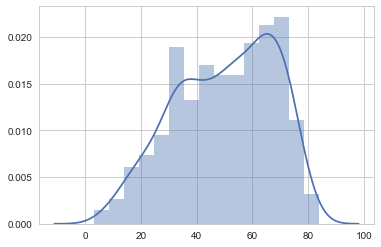

In [47]:
sns.distplot(filled['tavg'].values)

In [35]:
tmp = missing_to_nan_weather(1)

missing_to_nan started !
missing_to_nan completed !


In [39]:
len(tmp['tmax'].dropna())

1033

In [40]:
len(tmp['tmax'])

1035

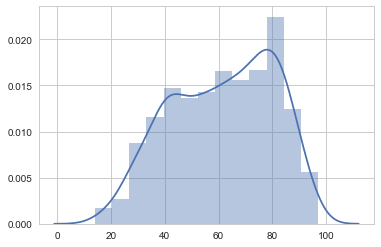

In [44]:
sns.distplot(tmp['tmax'].dropna().values)

In [49]:

print('missing_to_nan started !')

full_weather = load_weather()

# full_weather = full_weather[full_weather['station_nbr']==station_nbr]

# sunrise, sunset, category는 연속형변수가 아니므로 일단 뺌
weathers = set(list(full_weather.columns)[2:20])
targets = weathers - {'sunset','sunrise','codesum'}

def trim_str(x):
    import re
                        # 실수만 추출
    result = re.findall('(\d+(?:\.\d+)?)',x)
    if result:
        return float(result[0])
    return np.nan

for weather in targets:
    full_weather.loc[:,weather] = full_weather.loc[:,weather].astype(str).apply(trim_str).astype(float)

print('missing_to_nan completed !')

full_weather.reset_index(drop=True)

missing_to_nan started !
missing_to_nan completed !


,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
0,1,2012-01-01,52.0,31.0,42.0,NaN,36.0,40.0,23.0,0.0,...,NaN,0.05,29.78,29.92,3.6,20.0,4.6,2012,1,1
1,2,2012-01-01,48.0,33.0,41.0,16.0,37.0,39.0,24.0,0.0,...,0.0,0.07,28.82,29.91,9.1,23.0,11.3,2012,1,1
2,3,2012-01-01,55.0,34.0,45.0,9.0,24.0,36.0,20.0,0.0,...,0.0,0.00,29.77,30.47,9.9,31.0,10.0,2012,1,1
3,4,2012-01-01,63.0,47.0,55.0,4.0,28.0,43.0,10.0,0.0,...,0.0,0.00,29.79,30.48,8.0,35.0,8.2,2012,1,1
4,6,2012-01-01,63.0,34.0,49.0,0.0,31.0,43.0,16.0,0.0,...,0.0,0.00,29.95,30.47,14.0,36.0,13.8,2012,1,1
5,7,2012-01-01,50.0,33.0,42.0,NaN,26.0,35.0,23.0,0.0,...,0.0,0.00,29.15,30.54,10.3,32.0,10.2,2012,1,1
6,8,2012-01-01,66.0,45.0,NaN,NaN,34.0,46.0,NaN,NaN,...,NaN,0.00,30.05,NaN,11.0,36.0,10.9,2012,1,1
7,9,2012-01-01,34.0,19.0,27.0,NaN,17.0,23.0,38.0,0.0,...,NaN,NaN,29.34,30.09,22.8,30.0,22.5,2012,1,1
8,10,2012-01-01,73.0,53.0,63.0,NaN,55.0,58.0,2.0,0.0,...,NaN,0.00,30.16,30.19,5.1,24.0,5.5,2012,1,1
9,11,2012-01-01,72.0,48.0,60.0,7.0,54.0,56.0,5.0,0.0,...,0.0,0.00,30.15,30.18,4.6,23.0,4.8,2012,1,1


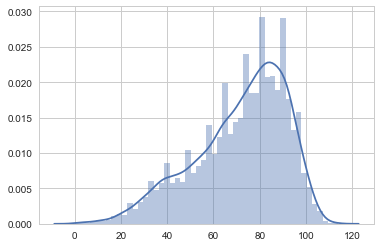

In [51]:
sns.distplot(full_weather['tmax'].dropna().values)

In [52]:
full_weather['tmax'].dropna().mean()

71.62398653816736